### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Dataset

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)
sns.set_style("whitegrid")

In [63]:
df=pd.read_csv("HR_capstone_dataset.csv")

In [64]:
df.head(50)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [66]:
df.shape

(14999, 10)

In [67]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Check for missing values

In [68]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# Check for duplicate values

In [69]:
df.duplicated().sum()

3008

In [70]:
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


Dropping duplicate values

In [71]:
df1=df.drop_duplicates(keep='first')

# Rename columns

In [72]:
df1=df1.rename(columns={"Work_accident":"work_accident",
                   "average_montly_hours":"average_monthly_hours",
                   "time_spend_company":"tenure",
                   "Department":"department"})

In [73]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Checking for Outliers

In [74]:
df_melted = df1[['satisfaction_level','last_evaluation','number_project','tenure']].melt(var_name='variables',value_name='values')



<Axes: xlabel='variables', ylabel='values'>

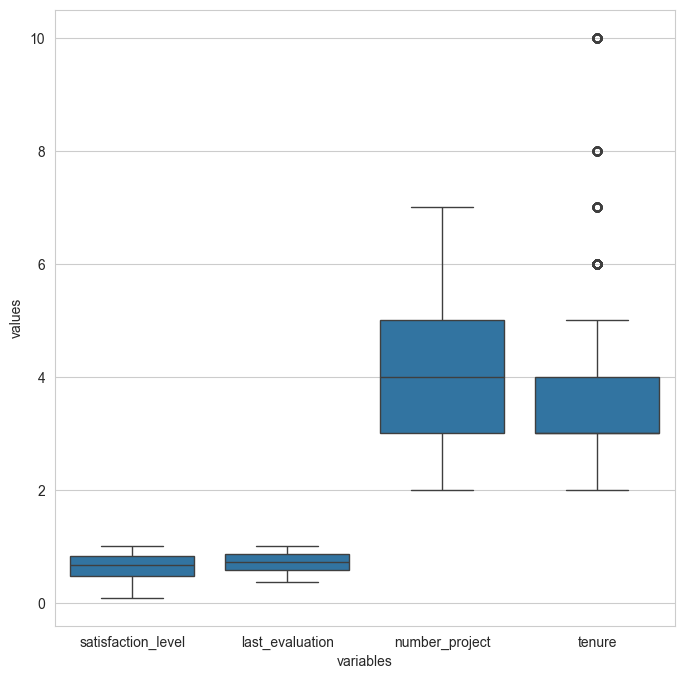

In [75]:
plt.figure(figsize=(8,8))
sns.boxplot(x='variables',y='values', data=df_melted)

it seems that tenure has some outliers. Let's investigate further by checking how many rows of 'tenure' are outliers. We can do this by finding the IQR, calculating the upper and lower limit for non-outlier values, and setting the condition where values higher than the upper limit or lower than the lower limit are outliers. Finally, use len to find how many rows are outliers.

In [76]:
#finding q1 value of tenure
q1=df1['tenure'].quantile(0.25)

#finding q3 value of tenure
q3=df1['tenure'].quantile(0.75)

#finding IQR
iqr=q3-q1

#finding upper and lower limit
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print(f"upper limit is {upper_limit}")
print(f"lower limit is {lower_limit}")

#outliers
outliers=df1[(df1['tenure']<lower_limit) | (df1['tenure']>upper_limit)]

print(f"number of rows containing outliers in tenure column is: {len(outliers)}")

upper limit is 5.5
lower limit is 1.5
number of rows containing outliers in tenure column is: 824


Right now I am unsure if i should remove the outliers. Will need to explore the data more and decide when I build my classification model.

# Data Exploration

How many employees left and what is the percentage of the total data points?

In [77]:
print(df1["left"].value_counts())
print(df1["left"].value_counts(normalize=True)*100)


left
0    10000
1     1991
Name: count, dtype: int64
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


In [78]:
df1.groupby(['left']).agg({"average_monthly_hours":['mean','median','std']})

average_monthly_hours                  
                      mean median        std
left                                        
0                198.94270  198.0  45.665507
1                208.16223  226.0  61.295145

average_monthly_hours for employees that left is skewed towards the left. Those that left had higher average monthly hours as compared to employees that have stayed.

In [79]:
df1.groupby(['left']).agg({"satisfaction_level":['mean','median','std']})

satisfaction_level                 
                   mean median       std
left                                    
0              0.667365   0.69  0.217082
1              0.440271   0.41  0.265207

Employees that left had a lower mean satisfaction score compared to employees who stayed.

#### Now let's do some visualizations to see the the relationships between the variables.

<Figure size 1200x600 with 0 Axes>

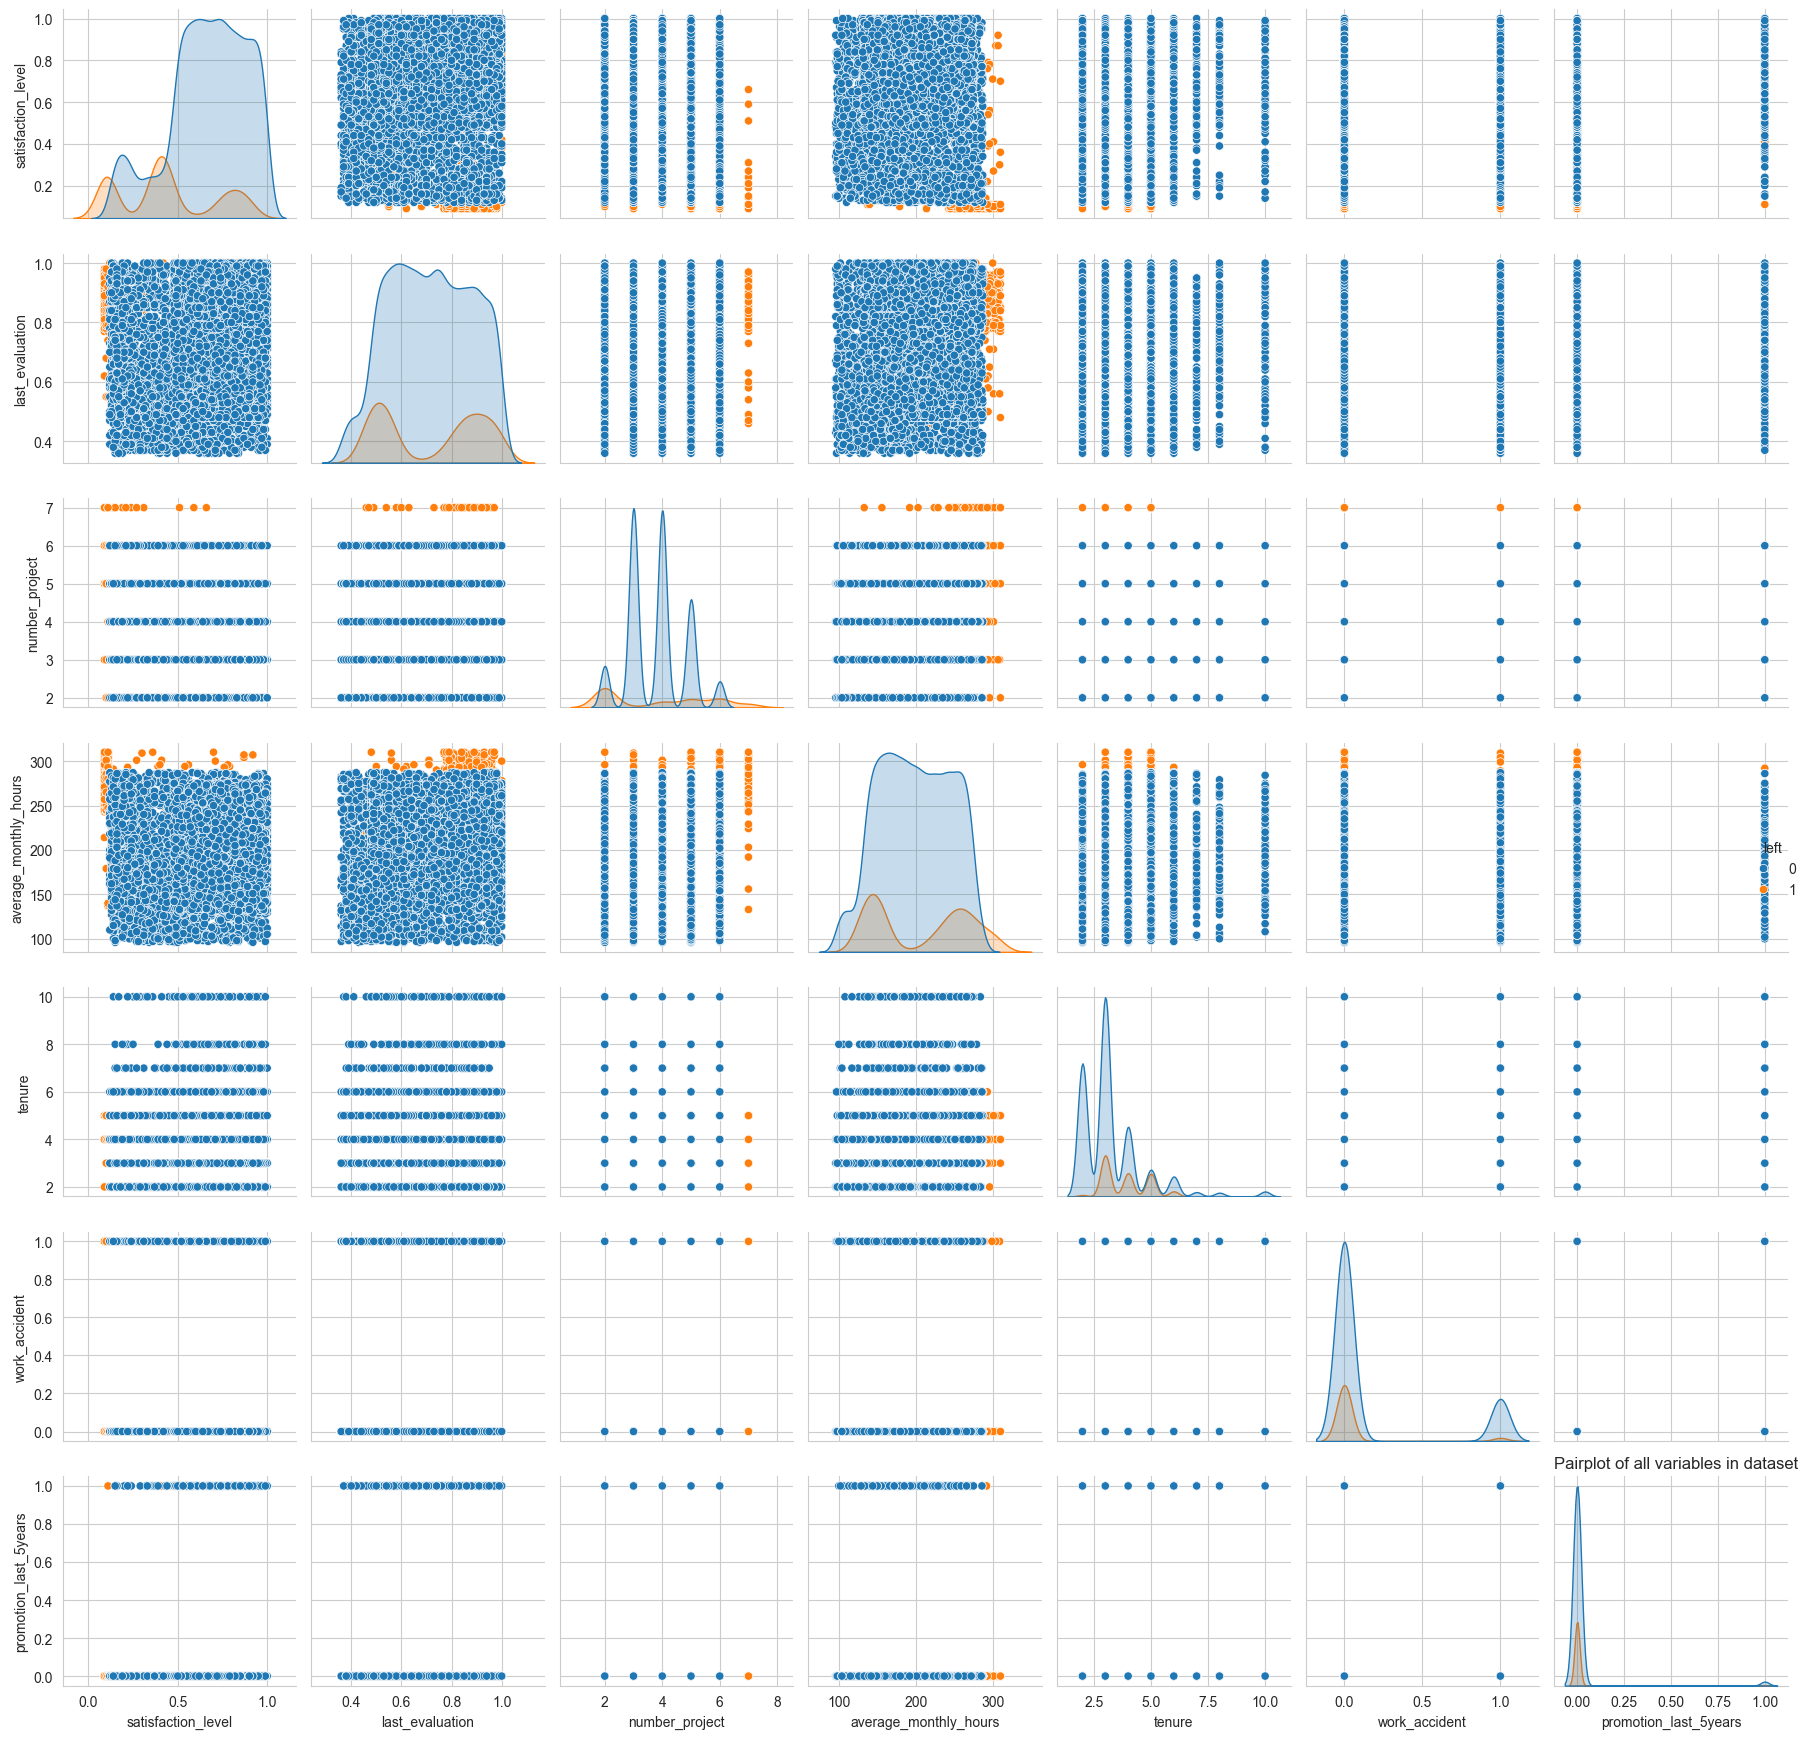

In [80]:
# Use a pairplot to see if there are any patterns or correlations between the data
plt.figure(figsize=(12,6))
sns.pairplot(df1,hue='left')
plt.title("Pairplot of all variables in dataset",loc='left')
plt.tight_layout()

### General Observations:

- Employees that left generally have a lower satisfaction level than employees who stayed
- Employees that left had a higher evaluation score but low satisfaction level
- Employees with 7 projects all left the company
- Employees that left worked generally longer average hours per month
- Employees that left had between 3 to 7 years tenure
- Very few employees got promoted in the last 5 years

## Average Monthly Hours vs Tenure

In [81]:
# Average hours worked globally
avg_hours=40*52/12
avg_hours

173.33333333333334

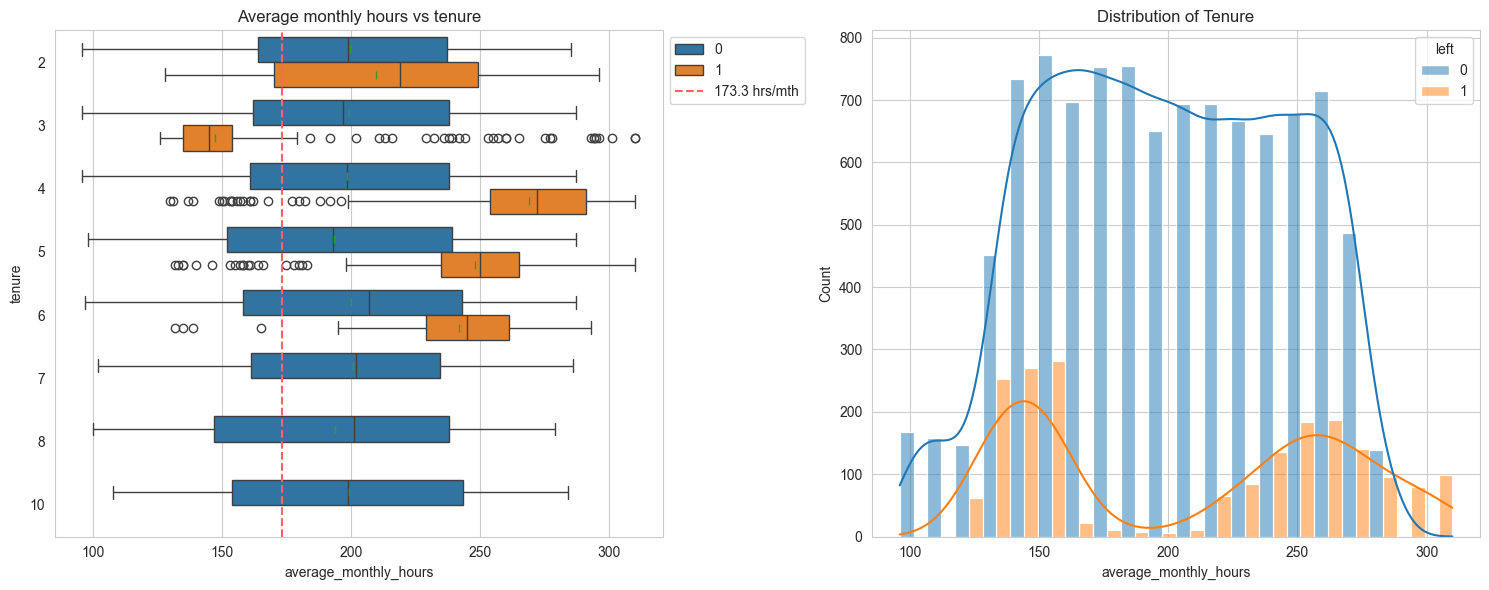

In [82]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(data=df1,x="average_monthly_hours",y="tenure",hue='left',orient='h',ax=axes[0],showmeans=True, meanprops={'marker':"|"})
axes[0].axvline(x=avg_hours, color='#ff6361', label='173.3 hrs/mth', ls='--')
axes[0].set_title("Average monthly hours vs tenure")
axes[0].legend(loc='upper left', bbox_to_anchor=(1,1))
sns.histplot(data=df1, x='average_monthly_hours', hue="left",multiple='dodge', bins=20, ax=axes[1],kde=True)
axes[1].set_title("Distribution of Tenure")
plt.tight_layout();

### Observations
It is natural for employees to feel burnt out when overworked. The next course of action would be to resign or find a new job. This seems to be the case here as employees that left generally work longer hours as compared to their counterparts.

1. When comparing average monthly hours worked and tenure, employees who have a tenure of 2,4,5,6 work longer hours ranging from 160 to 280 hours.

2. Employees that left with tenure of 4,5,6 have an IQR of 230-280 hours per month, much more compared to employees who stayed for all tenures. These employees are likely burnt out and could be middle managers/project managers handling multiple projects.

3. No Employees with tenure above 6 years left the company and all work around the median number of hours of 200. These are likely employees with a higher position and higher pay.

4. One interesting observation is employees who left with 3 years of tenure who work comparatively shorter hours of 120 - 180 hours. One reason for this group leaving could be that their jobs weren't align with their goals, assigned less project work, made redundent.

6. Looking at the distribution of average monthly hours, the sweet spot for average monthly hours seems to be ~200. Employees that left typically work 120-150hrs and 220-315 hrs. 

7. Most employees worked over the nominal average hours of 173.3 hrs/month.

6. All employees who worked 300 hrs and over left the company.

In [83]:
# count of employees who left based on tenure
df1[df1['left']==1]['tenure'].value_counts(normalize=True)*100

tenure
3    43.897539
4    24.861878
5    24.208940
6     5.474636
2     1.557007
Name: proportion, dtype: float64

## Number of Projects vs average monthly hours

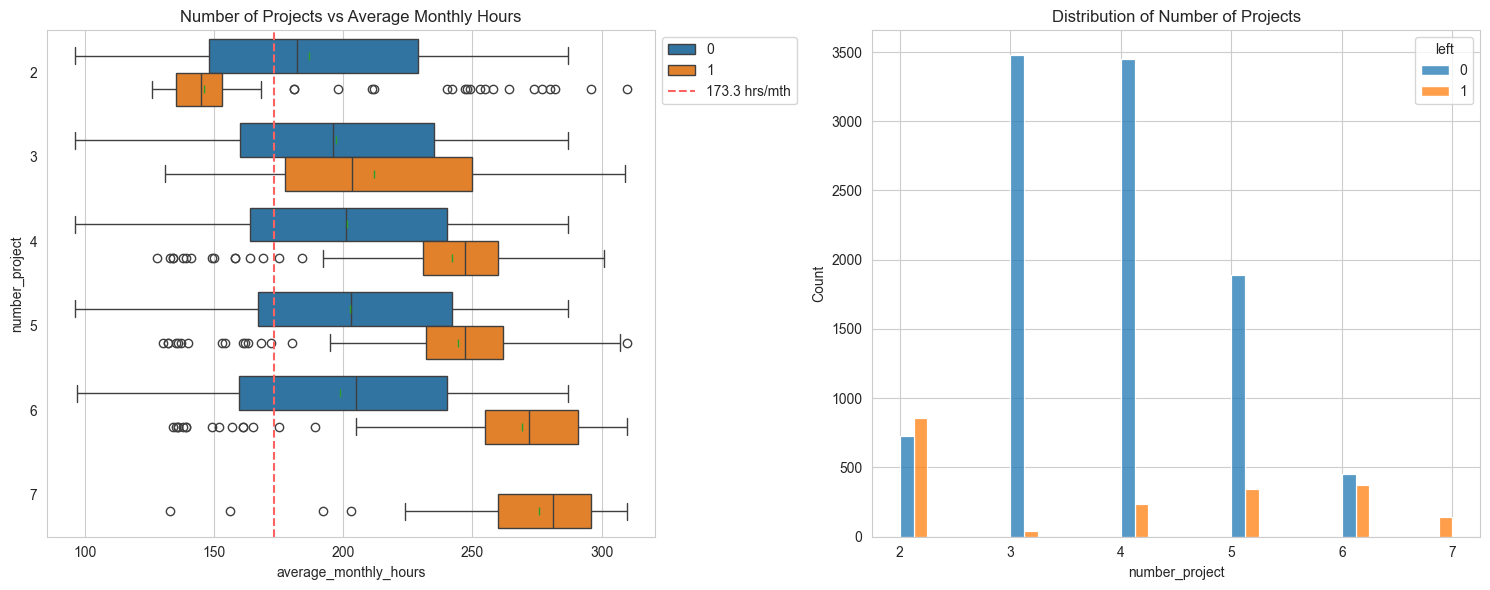

In [84]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(data=df1,x="average_monthly_hours",y="number_project",hue='left',orient='h',ax=axes[0],showmeans=True,meanprops={'marker':'|'})
axes[0].axvline(x=avg_hours, color='#ff6361', label='173.3 hrs/mth', ls='--')
axes[0].set_title("Number of Projects vs Average Monthly Hours")
axes[0].legend(loc='upper left', bbox_to_anchor=(1,1))
sns.histplot(data=df1, x='number_project', hue="left",multiple='dodge', bins=20, ax=axes[1])
axes[1].set_title("Distribution of Number of Projects")
plt.tight_layout();

## Observations

It is likely that employees who work on more projects work longer hours as well. There seems to be a positive correlation between number of projects and average monthly hours. For employees that left,the median hours increases as the number of projects increases. For employees that stayed, the mean and median hours stayed relatively the same for all number of projects.

The plots reveals some interesting insights:

1. There are employees that left who work on lesser number of projects with lesser working hours and those that work on more projects with a significantly greater number of hours. These 2 groups of employees exhibit opposite characteristics.

2. Employees that left involved in 2 projects worked the least number of hours with a mean of 150 compared to employees who stayed with a mean of 180. Several reasons why they left could be they were on notice and did not contribute as much or projects were delayed. 

3. Employees involved in 7 projects all left the company. These employees also work the highest number of hours in the company with a mean of 260. They were likely burnt out. 

4. Most employees that left were involved in 2 projects. These people were likely on noticed and therefore assigned lesser projects.

5. The optimal number of projects to assign an employee is 3 projects.


In [85]:
#% of employees that left by by number of projects
df1[df1['left']==1]['number_project'].value_counts(normalize=True)*100

number_project
2    43.043697
6    18.633852
5    17.227524
4    11.903566
7     7.282772
3     1.908589
Name: proportion, dtype: float64

## Satisfaction Level vs Number of Projects

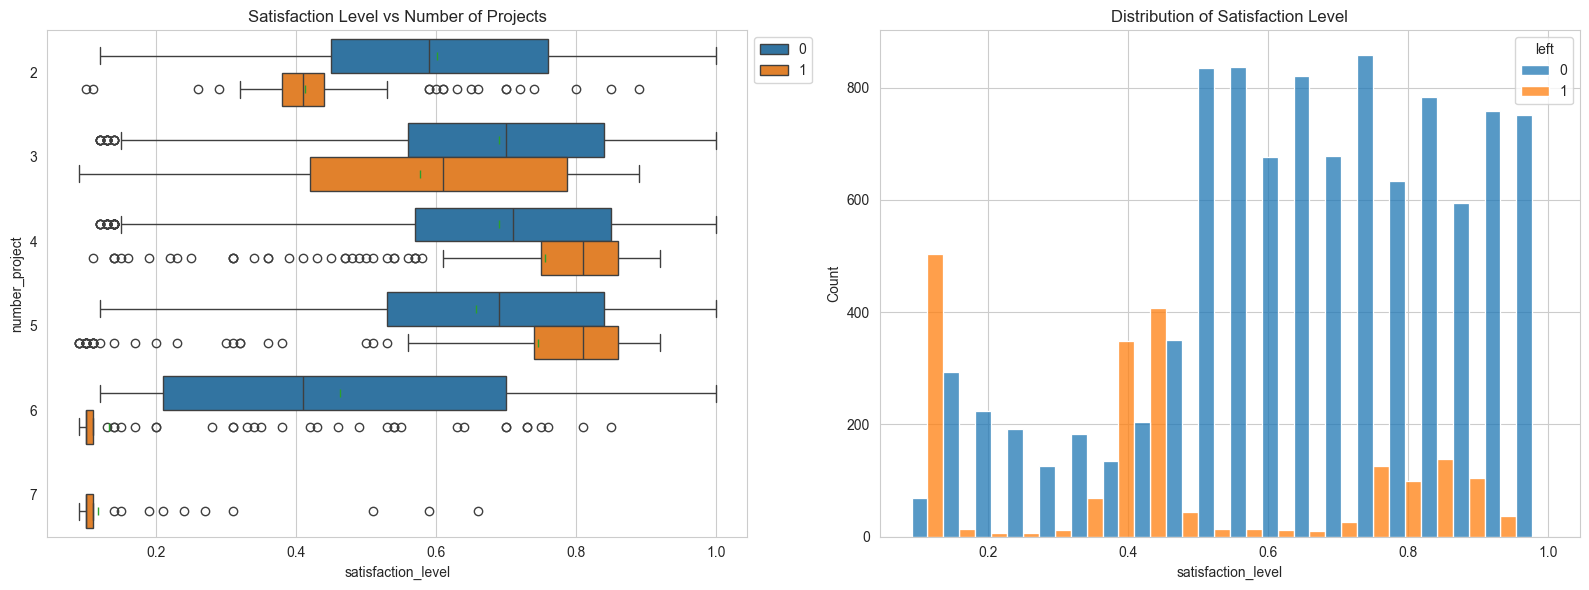

In [86]:
fig,axes = plt.subplots(1,2, figsize=(16,6))
sns.boxplot(data=df1,x="satisfaction_level",y="number_project",hue='left',orient='h', showmeans=True, meanprops={'marker':"|"}, ax=axes[0])
axes[0].set_title("Satisfaction Level vs Number of Projects")
axes[0].legend(loc='upper left',bbox_to_anchor=(1,1))
sns.histplot(data=df1,x='satisfaction_level',hue='left',multiple='dodge',bins=20, ax=axes[1])
axes[1].set_title("Distribution of Satisfaction Level")
plt.tight_layout();

### Observations

Satisfaction level seems to increase with the number of projects. However, this is true only for employees involved with 2-5 projects. There are 3 groups of employees that left the company: the first group are disatisfied employees who are involved in 2 projects. The second group are generally satisfied employees involved with 3-5 projects. The third group are extremely dissatisfied employees who are involved in 6-7 projects.

The plot reveals some interesting insights:

1. Employees who left that worked on 6-7 projects had the lowest satisfaction level of almost 0.

2. Employees who left that worked 2 projects had a low satisfaction score of 0.3-0.5. Two projects could have been too little, or employees who were already leaving were assigned two projects and gave a low satisfaction score. 

3. Previous observation revealed the optimal number of projects is 3 (where least employees leave). However, we also see that employees are most satisfied when working on 4 to 5 projects. They have a median satisfaction score of 0.8, the highest among all employees.

4. Satisfaction level for employees that left are more skewed to the left while employees that stayed are skewed to the right.

In [87]:
sat_level=df1[df1['left']==1]['satisfaction_level'].value_counts(normalize=True)*100
sat_level.head(10)

satisfaction_level
0.10    10.195881
0.11     9.442491
0.09     5.524862
0.43     5.273732
0.37     4.671020
0.40     4.470116
0.44     4.369663
0.38     4.269211
0.39     4.118533
0.45     4.018081
Name: proportion, dtype: float64

## Monthly Hours vs Satisfaction Level

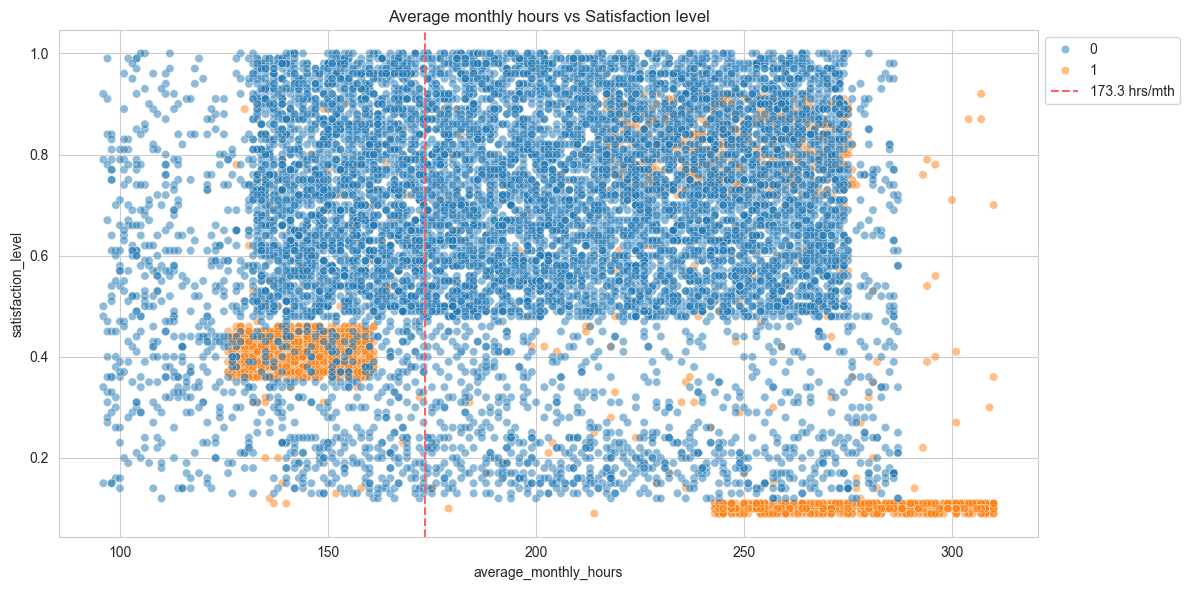

In [88]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df1, y='satisfaction_level', x='average_monthly_hours', hue='left', alpha=0.5)
plt.axvline(x=avg_hours,ls='--',color='#ff6361', label='173.3 hrs/mth')
plt.title("Average monthly hours vs Satisfaction level")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout();

### Observations

Focusing on employees who left:

1. The scatter plot shows that here are a group of employees who left that worked 130-160 hrs,lesser than average hours, but had a low satisfaction score of ~0.4. 

2. There are a group of employees who left that worked 240 - 325 hours that had a satisfaction score of close to 0. These employees work much more hours as compared to the rest of the employees which likely led to the low score.  

3. There is also a group that worked 230 - 280 hours, closer but still much higher than average hours, that had a satisfaction score of 0.7-0.9


### Satisfaction Level vs Tenure

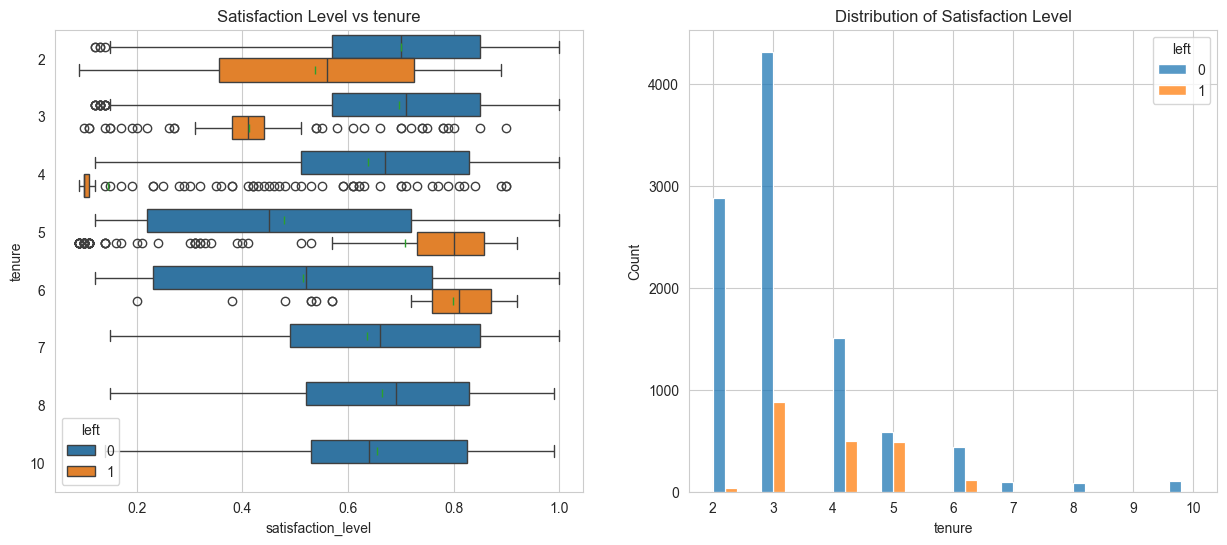

In [89]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(data=df1,x="satisfaction_level",y="tenure",hue='left',orient='h',ax=axes[0], showmeans=True, meanprops={'marker':"|"})
axes[0].set_title("Satisfaction Level vs tenure")
sns.histplot(data=df1, x='tenure', hue="left",multiple='dodge', bins=20, ax=axes[1])
axes[1].set_title("Distribution of Satisfaction Level");

### Observations

1. There are two groups of employees that left: dissatisfied employees with short tenures 2-4 years, and very satisfied employees with medium tenure of 5-6 years.

2. Employees that left with a tenure of 4 years had a unusually low satisfaction level close to 0. There might have been a policy change and company exercise that afffected employees at that category. 

3. Employees with tenures longer than 6 years did not leave, and their means satisfaction levels are similar to newer employees who stayed.

4. The histogram shows that most employees have a tenure of 2-3 years. Over that would likely be employees of higher ranking. There are very few employees with longer tenure of 7-10 years, these are likely the highest ranking and highest paid employees.

### Average Monthly Hours vs Last evaluation Score

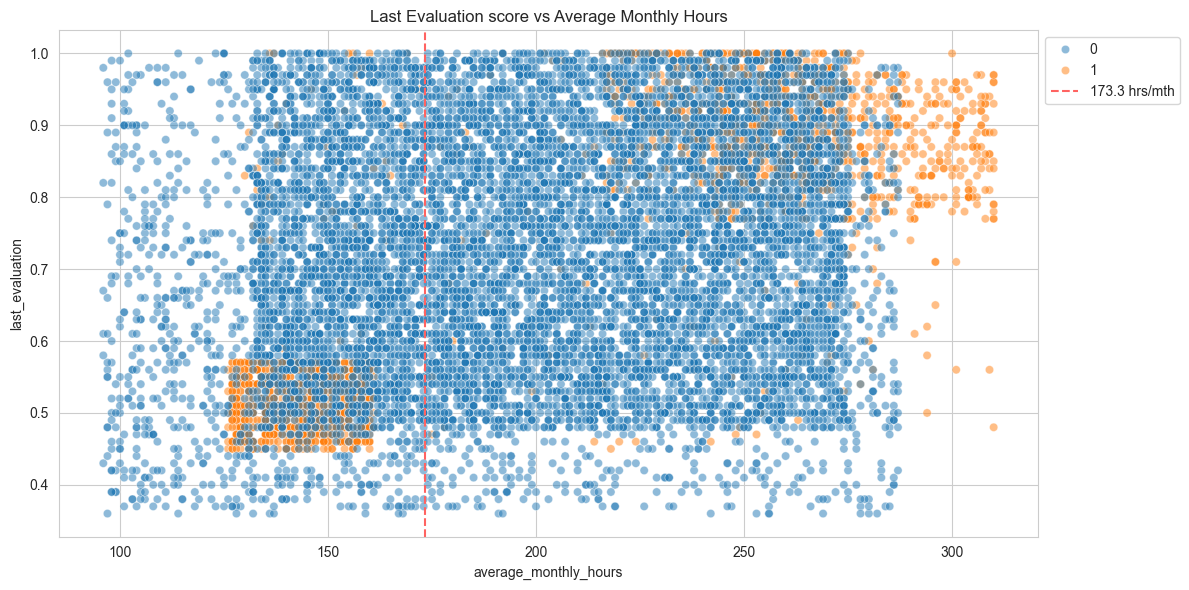

In [90]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5)
plt.axvline(x=avg_hours,ls='--',color='#ff6361', label='173.3 hrs/mth')
plt.title("Last Evaluation score vs Average Monthly Hours")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout();

### Observations

1. There are two groups of employees that left: employees that worked slightly below average monthly hours with lower evaluation scors, and employees that are overworked with high evaluation scores.
2. Looks like there is a positive correlation between average monthly hours and evaluation scores
3. There are some employees that work lesser hours but had high evaluation scores and vice versa. Although there is a positive correlation, working longer hours does not mean a high evaluation score.

## Average Monthly Hours vs Salary

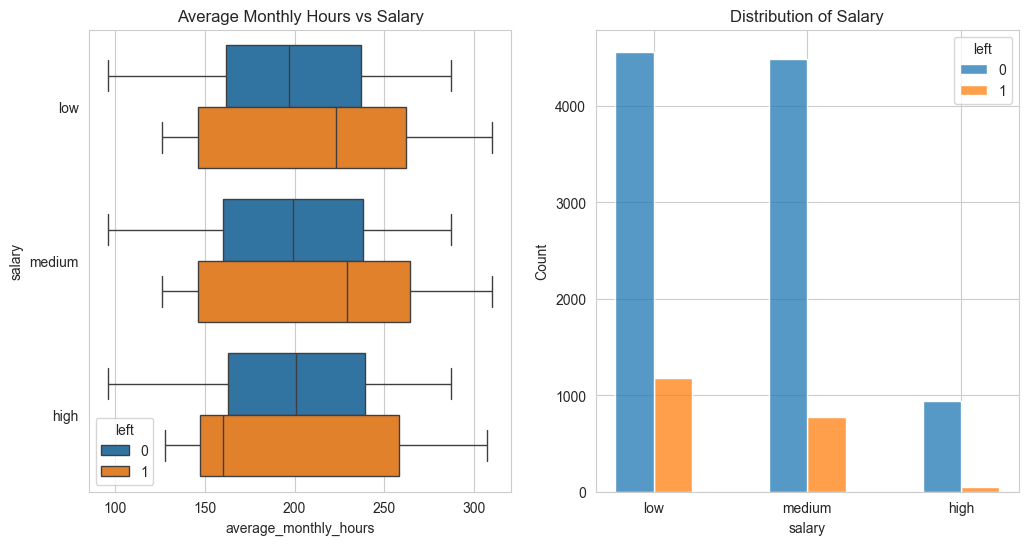

In [91]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
sns.boxplot(data=df1,x="average_monthly_hours",y="salary",hue='left',orient='h',ax=axes[0])
axes[0].set_title("Average Monthly Hours vs Salary")
sns.histplot(data=df1, x='salary', hue="left",multiple='dodge',shrink=0.5, bins=20, ax=axes[1])
axes[1].set_title("Distribution of Salary");

### Observations

1. For all categories of Salary, employees who left worked longer hours than those who stayed.

2. The median average monthly hours for high salary employees who left is much lower at 160 hours compared to low and medium salary employees at 230hrs.

3. Most employees are take home low - medium salaries.

## Count of Employees who stayed/left

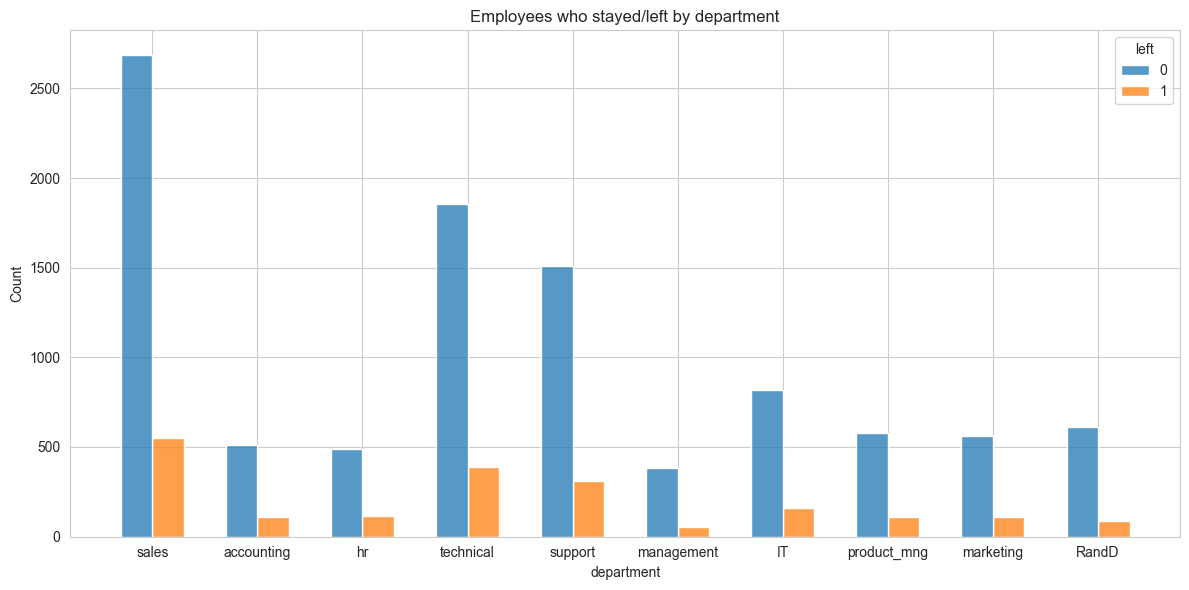

In [92]:
plt.figure(figsize=(12,6))
sns.histplot(data=df1,x="department", hue='left',multiple='dodge', shrink=0.6)
plt.title("Employees who stayed/left by department")
plt.tight_layout();

## Observations

1. There is not much difference in the number of employees who left by department.
2. Sales had the highest turnover while management had the lowest.
3. Most employees are in sales, technical and support roles



## Correlations

In [93]:
df2=df1.drop(columns=['department','salary'], axis=1)

<Axes: >

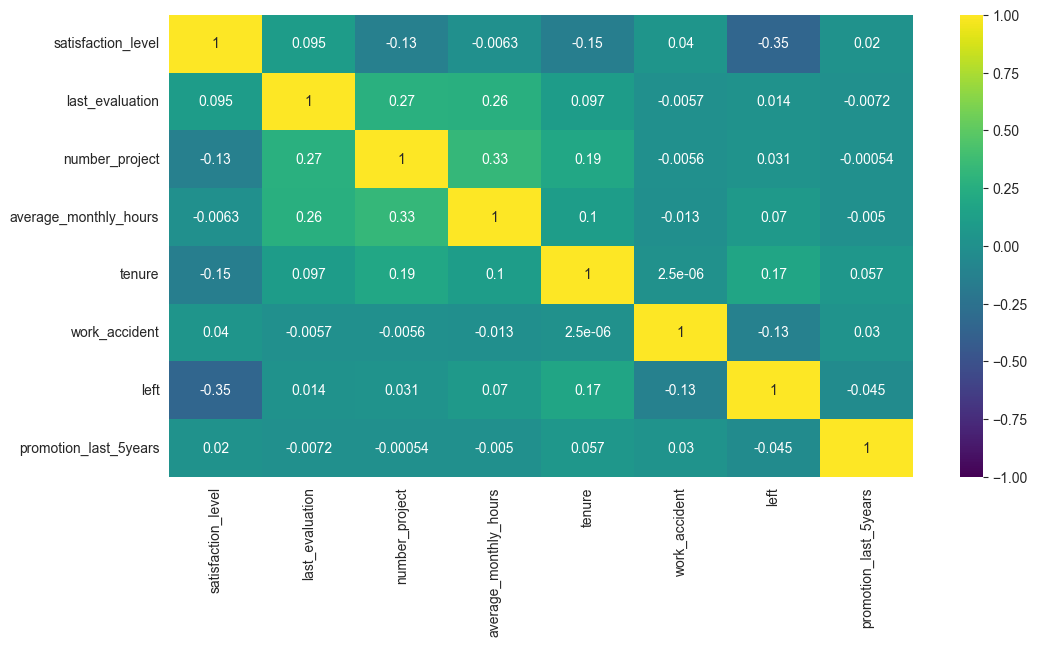

In [94]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df2.corr(), vmin=-1,vmax=1, annot=True, cmap='viridis')

The variables last_evaluation,number_project,average_monthly_hours and tenure has some positive correlation with each other. 

Whether an employee leaves is also negatively correlated with satisfaction level. 

# Summary

It seams that employees leaving are a result of poor project and employee management. Employees leaving is tied to longer working hours, high number of projects, and generally lower satisfaction levels. Longer working hours with no promotion, promotion and salary raise can cause employees to feel unappreciated. These employees are also likely burnt out. 

Employees who stayed in the company longer than 6 years are unlikely to leave. These employees work shorter hours, have higher pay, and higher satisfaction level overall.

# Model Construction

The goal of this project is to create a model to predict whether an employee leaves the company. The outcome will be a categorical value of either 1 (left) or 0(stayed)

Since the outcome is categorical, I could build a logistic regression model or use a tree-based model.

I will implement both and see which model produces a better result.

## Logistic Regression model

First, I will need to encode department and salary into numeric values.

Department is a nominal categorical variable, so I can dummy it for modelling.

Salary is also a categorical variable but ordinal, there is the hierachy of low, medium and high. Rather than dummying it, i will convert the levels to numbers 0-2

In [123]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,roc_auc_score

In [96]:
df_enc=df1.copy()

In [97]:
label_encoder=LabelEncoder()
df_enc['salary']=label_encoder.fit_transform(df_enc['salary'])

In [98]:
df_enc=pd.get_dummies(df_enc,columns=['department'],dtype='int')

In [99]:
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [100]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [101]:
#isolate the outcome variable
y=df_logreg['left']
X=df_logreg.drop('left',axis=1)

In [102]:
# count of employees who left vs stayed
print(df1["left"].value_counts())
print(df1["left"].value_counts(normalize=True)*100)

left
0    10000
1     1991
Name: count, dtype: int64
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


There is an 83%-17% split. So the data is not perfectly balanced. I will use Strtify during the train test split to balance out the classes.

In [103]:
# train test split
# instantiate the model and fit training data
# use the model and make prediction on data set
# create confusion matrix to view the results
#create classification report to view the f1 score, recall, precision 
# if class balance is bad, resample

In [104]:
# Splitting the train and test data. Use stratify as there is a large class imbalance between left and stayed.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=41,stratify=y)

In [105]:
#instantiate model and fit with training data
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

c:\Users\clyve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
#predicting results with test data
y_pred=log_model.predict(X_test)

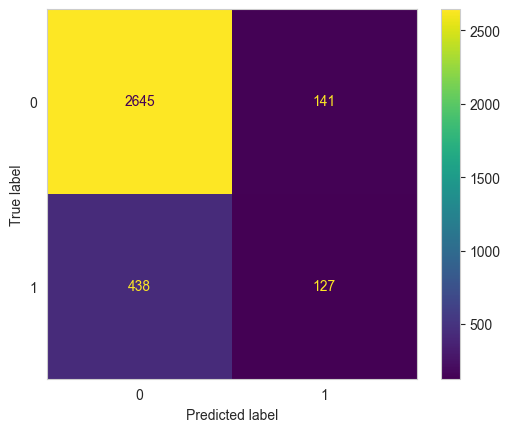

In [149]:
#compute matrix values
log_cm=confusion_matrix(y_test,y_pred,labels=log_model.classes_)

#display confusion matrix
log_cm_display=ConfusionMatrixDisplay(confusion_matrix=log_cm,display_labels=log_model.classes_)
log_cm_display.plot(values_format='')

plt.grid(False)

plt.show();

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

In [108]:
# Classification Report

target_names=['Predicted would stay','Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

 Predicted would stay       0.86      0.95      0.90      2786
Predicted would leave       0.47      0.22      0.30       565

             accuracy                           0.83      3351
            macro avg       0.67      0.59      0.60      3351
         weighted avg       0.79      0.83      0.80      3351



The model achieved a strong precision and recall score of 86% and 95% when predicting for employees that would stay. However, if it is more important to predict whether an employee would leave, this model performs much worse with a precision and recall score of 47% and 22% respectively.

## Using a Tree-Based Model

### Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [110]:
rf = RandomForestClassifier(random_state=0)


In [111]:
# Hyperparameters for GridSearch
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# list of scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [112]:
#fitting model with training data
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [113]:
print("Best parameters:", rf1.best_params_)
best_rf = rf1.best_estimator_



Best parameters: {'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500}


In [126]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

#### Random Forest Model Evaluation

In [128]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.968942  0.923305  0.945559  0.982088  0.986676


## XGBoost

In [129]:
from xgboost import XGBClassifier

In [132]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1','roc_auc']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [133]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [134]:
print("Best parameters:", xgb_cv.best_params_)
best_xgb = xgb_cv.best_estimator_

Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 500}


#### XGBoost Model Evaluation

In [135]:
# Get all CV scores
xgb_cv_results = make_results('xgb cv', xgb_cv, 'auc')
print(xgb_cv_results)

    model  precision    recall        F1  accuracy       auc
0  xgb cv   0.973598  0.925585  0.948896  0.983239  0.987753


## Comparing both models

In [136]:
print(xgb_cv_results)
print(rf1_cv_results)

    model  precision    recall        F1  accuracy       auc
0  xgb cv   0.973598  0.925585  0.948896  0.983239  0.987753
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.968942  0.923305  0.945559  0.982088  0.986676


The evaluation score for the XGB model are better than those of the random forest model for all metrics.

I will use the test data on the XBG model.

## Using champion model to predict on test data

In [141]:
def get_scores(model_name:str, model, X_test_data, y_test_data):

    pred_y = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, pred_y)
    accuracy = accuracy_score(y_test_data, pred_y)
    precision = precision_score(y_test_data, pred_y)
    recall = recall_score(y_test_data, pred_y)
    f1 = f1_score(y_test_data, pred_y)



    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc' : [auc]
                         })  
    return table

In [142]:
xgb_test_score=get_scores('xgb test', xgb_cv, X_test, y_test)
xgb_test_score

,model,precision,recall,f1,accuracy,auc
0,xgb test,0.963671,0.892035,0.926471,0.976127,0.942608


In [143]:
xgb_pred = best_xgb.predict(X_test)

In [144]:
target_names=['Predicted would stay','Predicted would leave']
print(classification_report(y_test, xgb_pred, target_names=target_names))

                       precision    recall  f1-score   support

 Predicted would stay       0.98      0.99      0.99      2786
Predicted would leave       0.96      0.89      0.93       565

             accuracy                           0.98      3351
            macro avg       0.97      0.94      0.96      3351
         weighted avg       0.98      0.98      0.98      3351



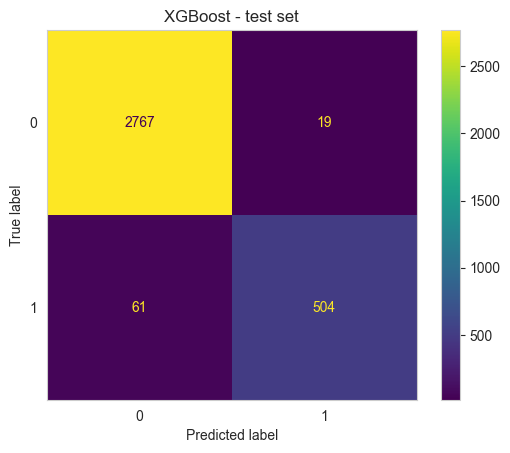

In [150]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, xgb_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()
plt.grid(False)

plt.title('XGBoost - test set')
plt.show()

## Evaluation of champion model

Focusing on "predicted would leave", scores on the test set seems to be very high as well. 

**Precision** - High precision means that when the model predicts an employee will leave, it is likely correct. (low false positives)

**Recall** - High recall means that the model is good at capturing all true cases of employees leaving. It misses a few (ow false negatives)

It has high precision of 0.96, meaning that the model is accurately identifies employees who are leaving. When an employee is leaving, the prediction is correct 96% of the time. Not many employees are incorrectly flagged as leaving.

The recall value is lower at 0.89, meaning that the model identifies 89% of all employees who actually leave. However, it misses predicting 11% of employees who actually left and were flagged as staying.

The model produces more False Negatives than False Positives, which means that some employees might be misidentified as staying when they actually left.

## Feature Engineering

Instead of using average Hours, I will change it into a binary variable called 'overworked'. Employees who already decided to quit or are on notice likely will be working fewer hours. I will set the threshold to be above 173.3 hrs/mth as overworked.


I will remove the column "satisfaction level" for the same reason as Average hours, and add in a column called "dissatisfied" with a bninary variable.
The threshold will be above < 0.6

In [116]:
#Adding overworked as a binary variable instead of using hours. 
df2['overworked'] = df2['average_monthly_hours']
df2['overworked'] = (df2['overworked'] > avg_hours).astype(int)


In [117]:
# Dropping average hours column
df2 = df2.drop('average_monthly_hours', axis=1)

In [120]:
#Adding satisfied as a binary variable instead of using score. 
df2['satisfied'] = df2['satisfaction_level']
df2['satisfied'] = (df2['satisfied'] > 0.6).astype(int)

In [121]:
#dropping satisfaction level column
df2 = df2.drop('satisfaction_level', axis=1)

In [122]:
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,overworked,satisfied
0,0.53,2,3,0,1,0,0,0
1,0.86,5,6,0,1,0,1,1
2,0.88,7,4,0,1,0,1,0
3,0.87,5,5,0,1,0,1,1
4,0.52,2,3,0,1,0,0,0


In [151]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [152]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

# RandomForest with additional features

In [153]:
rf = RandomForestClassifier(random_state=0)

In [155]:
# Hyperparameters for GridSearch
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# list of scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [156]:
#fitting model with training data
rf2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [157]:
print("Best parameters:", rf2.best_params_)
best_rf = rf2.best_estimator_

Best parameters: {'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}


In [159]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  random forest2 cv    0.86038  0.903552  0.881336  0.959635  0.971044


# XGBoost with additional features

In [160]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1','roc_auc']

# Instantiate the GridSearchCV object
xgb2_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [161]:
xgb2_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [162]:
print("Best parameters:", xgb_cv.best_params_)
best_xgb2 = xgb2_cv.best_estimator_

Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 500}


In [163]:
# Get all CV scores
xgb2_cv_results = make_results('xgb cv', xgb2_cv, 'auc')
print(xgb2_cv_results)

    model  precision    recall        F1  accuracy       auc
0  xgb cv   0.940135  0.893504  0.916151  0.972868  0.975611


## Comparing both models

In [164]:
print(xgb2_cv_results)
print(rf2_cv_results)

    model  precision    recall        F1  accuracy       auc
0  xgb cv   0.940135  0.893504  0.916151  0.972868  0.975611
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv    0.86038  0.903552  0.881336  0.959635  0.971044


The scores dropped slightly, but the XGBoost model performs better than the random forest if using AUC as the deciding metric. 

## Using Champion model to predict on test data - part 2

In [165]:
xgb2_test_score=get_scores('xgb test', xgb2_cv, X_test, y_test)
xgb2_test_score

,model,precision,recall,f1,accuracy,auc
0,xgb test,0.935146,0.89759,0.915984,0.972648,0.942595


In [166]:
xgb2_pred = best_xgb2.predict(X_test)
target_names=['Predicted would stay','Predicted would leave']
print(classification_report(y_test, xgb2_pred, target_names=target_names))

                       precision    recall  f1-score   support

 Predicted would stay       0.98      0.99      0.98      2500
Predicted would leave       0.94      0.90      0.92       498

             accuracy                           0.97      2998
            macro avg       0.96      0.94      0.95      2998
         weighted avg       0.97      0.97      0.97      2998



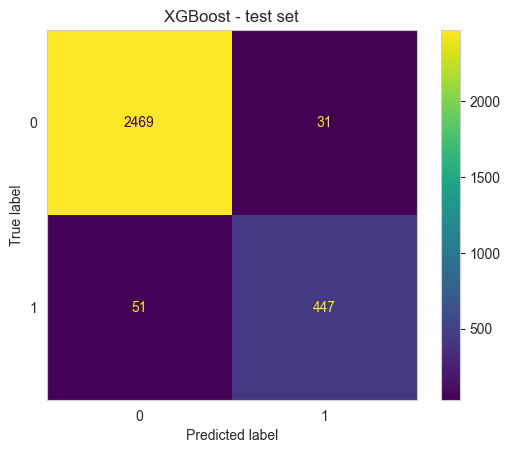

In [167]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, xgb2_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()
plt.grid(False)

plt.title('XGBoost - test set')
plt.show()

The model produces more False Negatives than False Positives, which means that some employees might be misidentified as staying when they actually left. 

It has high precision of 0.94, meaning that the model is accurately identifies employees who are leaving. When an employee is leaving, the prediction is correct 96% of the time. Not many employees are incorrectly flagged as leaving.

The recall value is lower at 0.90, meaning that the model identifies 89% of all employees who actually leave. However, it misses predicting 10% of employees who actually left and were flagged as staying.

The model produces more False Negatives than False Positives, which means that some employees might be misidentified as staying when they actually left.

# Feature Importance

### Feature importance for Random Forest

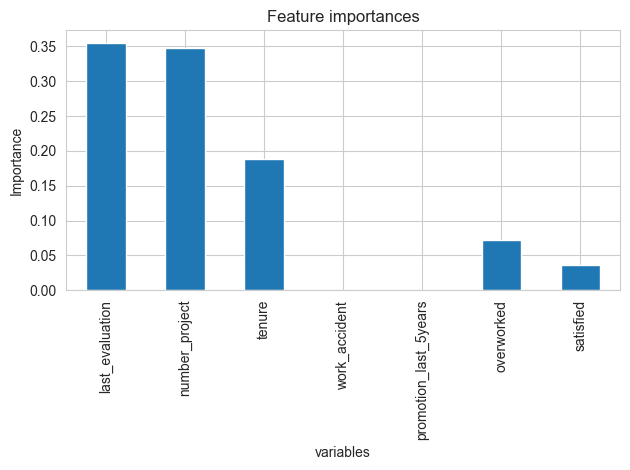

In [170]:
importances = rf2.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Importance')
ax.set_xlabel("variables")
fig.tight_layout()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the random forest model

### Feature importance for XGBoost

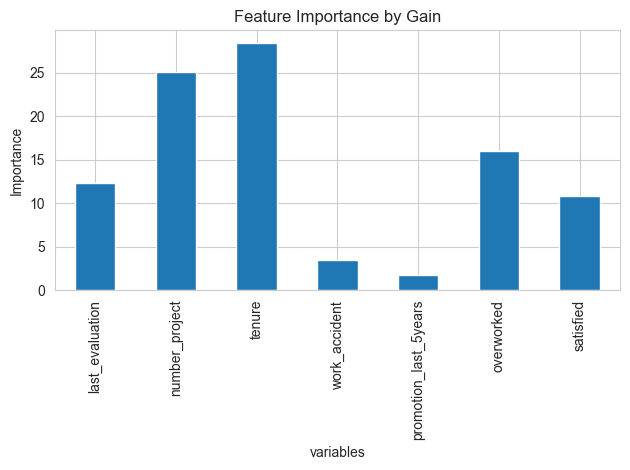

In [181]:
# Get importance based on gain
gain_importance = best_xgb2.get_booster().get_score(importance_type='gain')
gain_importances = pd.Series(gain_importance, index=X_test.columns)

fig, ax = plt.subplots()
gain_importances.plot.bar(ax=ax)
ax.set_title("Feature Importance by Gain")
ax.set_ylabel('Importance')
ax.set_xlabel("variables")
fig.tight_layout()

The plot above shows that for the XGBoost model, `tenure`, `number_project`, `overworked`,`last_evaluation` and `Satisfied` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the XGBoost Model.

# Results and Evaluation

### Summary of model results

**Logistic Regression**
- The Logistic Regression model had a precision of 0.79, recall of 0.83, f1 score of 0.80 using it's weighted average. If we only evaluate how the model performs when predicting if employees would leave, it scores much lower for all metrics(precision:0.47, recall:0.22, f1:0.30).

**Tree-Based Model**
-  The champion model used is the XGboost model.
-  On the test data,the XGBoost model had a precision of 0.93, recall of 0f 0.89, f1 score of 0.89, accuracy of 0.91 and auc of 0.94.


### Recommendations and next steps

To increase company retention, these recommendations could be presented to stakeholders:

1. Reward employees who work longer hours with higher salary or other benefits. If not, discourage employees from working above a certain number of hours per month.

2. Re-evaluate project management guidelines, and resource allocation to projects. Employees should not be working on more than 3 projects at once. 

3. High evaluation scores should not be only for employees who work long hours, but rather for the work done. Re-evaluate the reward structure proportion to the benefit the employee has created for the company/or the amount of effort put in.

4. Consider promoting employees who have stayed for more than 4 years to a management role as employees who have a tenure of 4 years have an unsually low satisfaction score.

5. Quarterly company-wide discussions on work culture, employee evaluations, and regular department check-ups to address work issues.
